In [2]:
# 파일 불러오기 (다양한 날씨 요인에 따른 PV 수치)

import numpy as np
import pandas as pd

df = pd.read_csv('spg.csv')
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


질문 1. 다양한 칼럼들의 값은 어떠한 분포를 따를까?

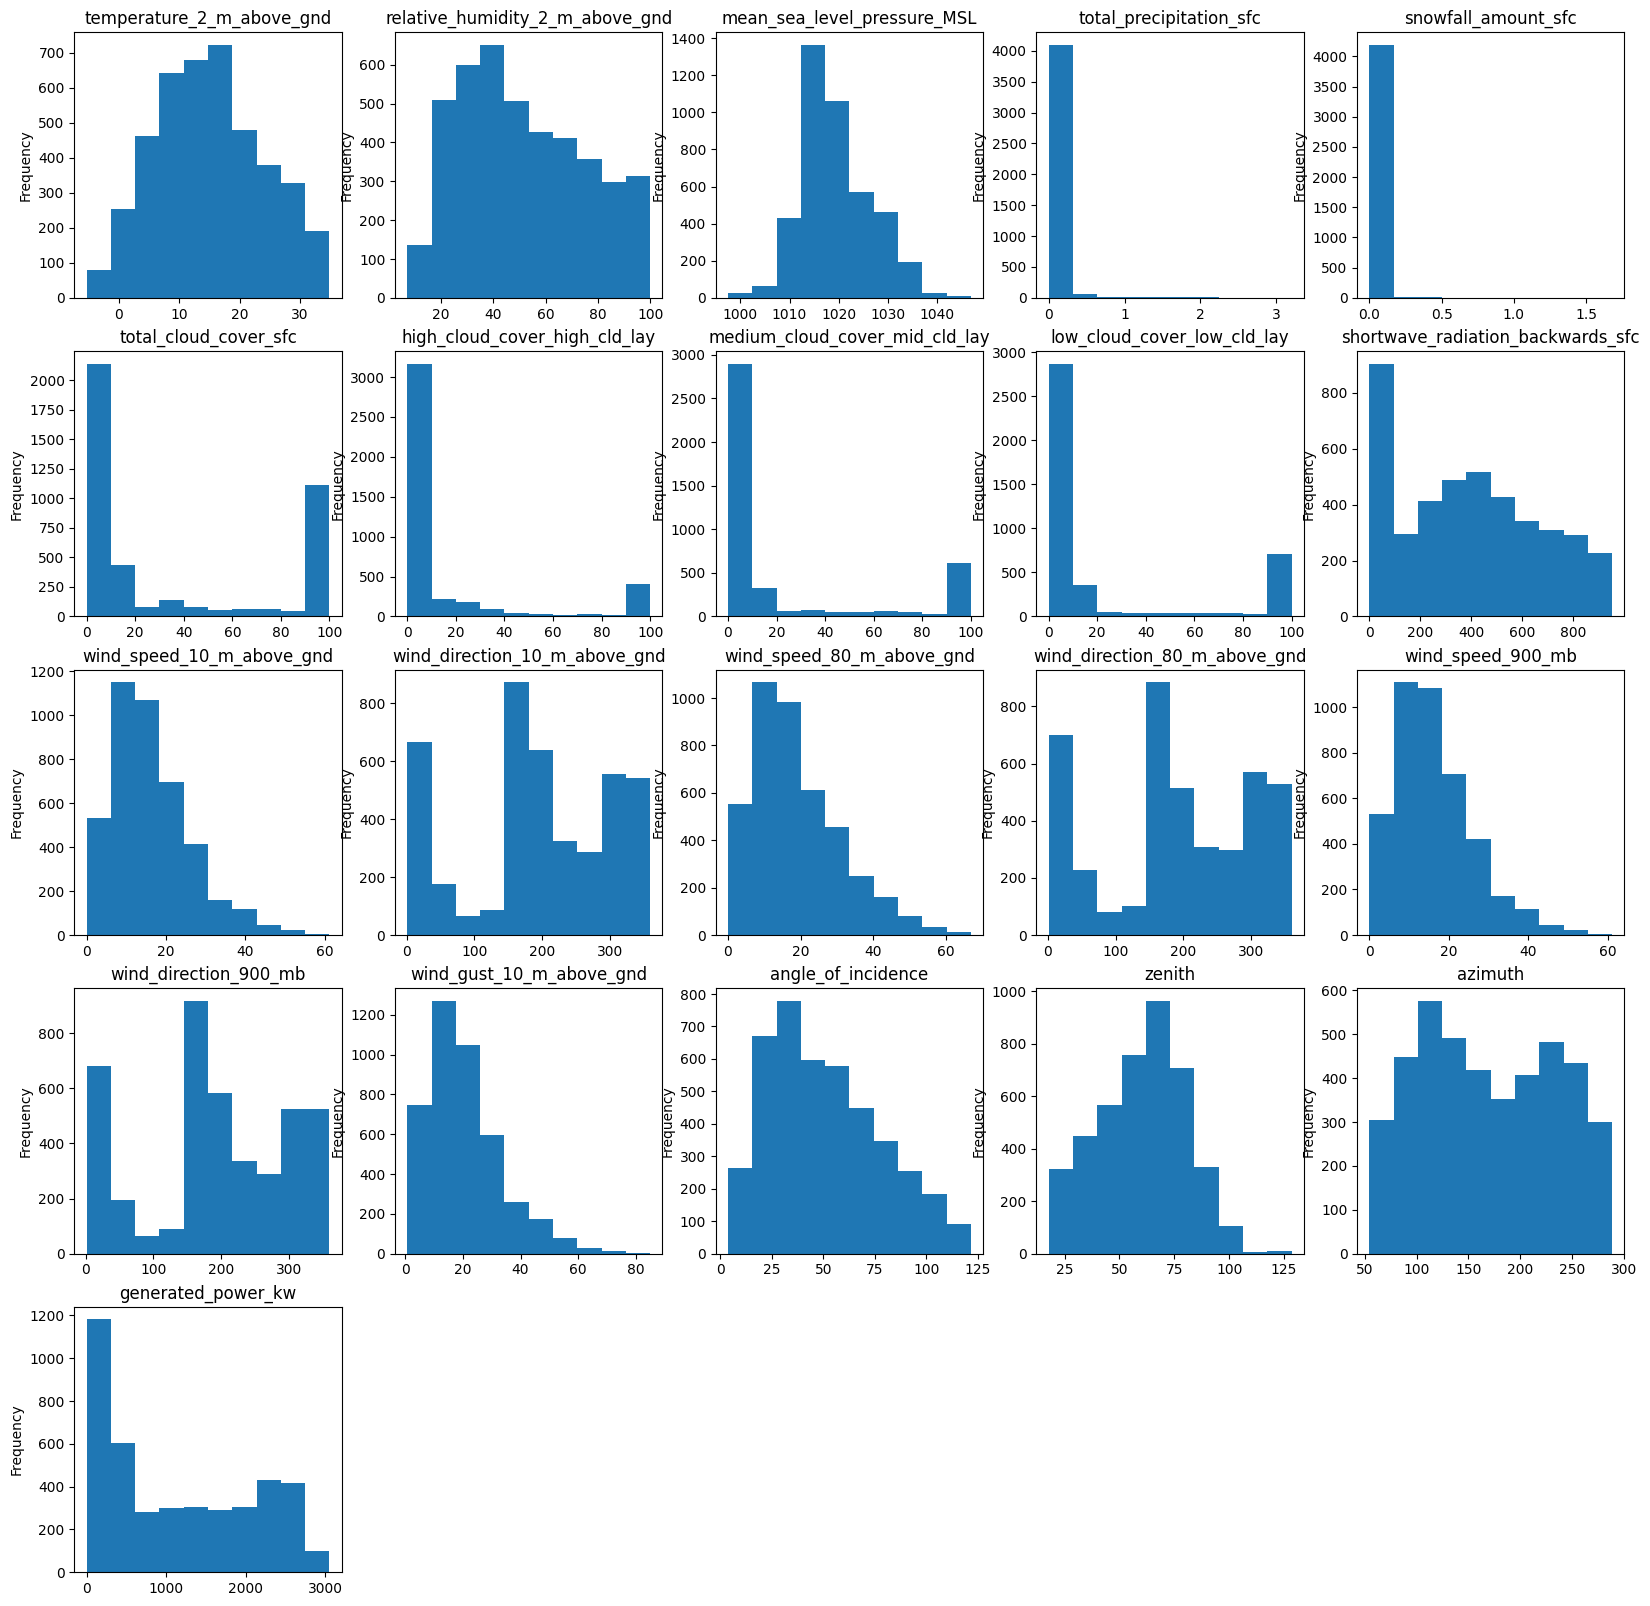

In [3]:
import matplotlib.pyplot as plt

# 다양한 column들의 분포 보기
plt.figure(figsize=(20,20))
for i in range(len(df.columns)):
    plt.subplot(5,5,i+1)
    df[df.columns[i]].plot(kind='hist')
    plt.title(df.columns[i])

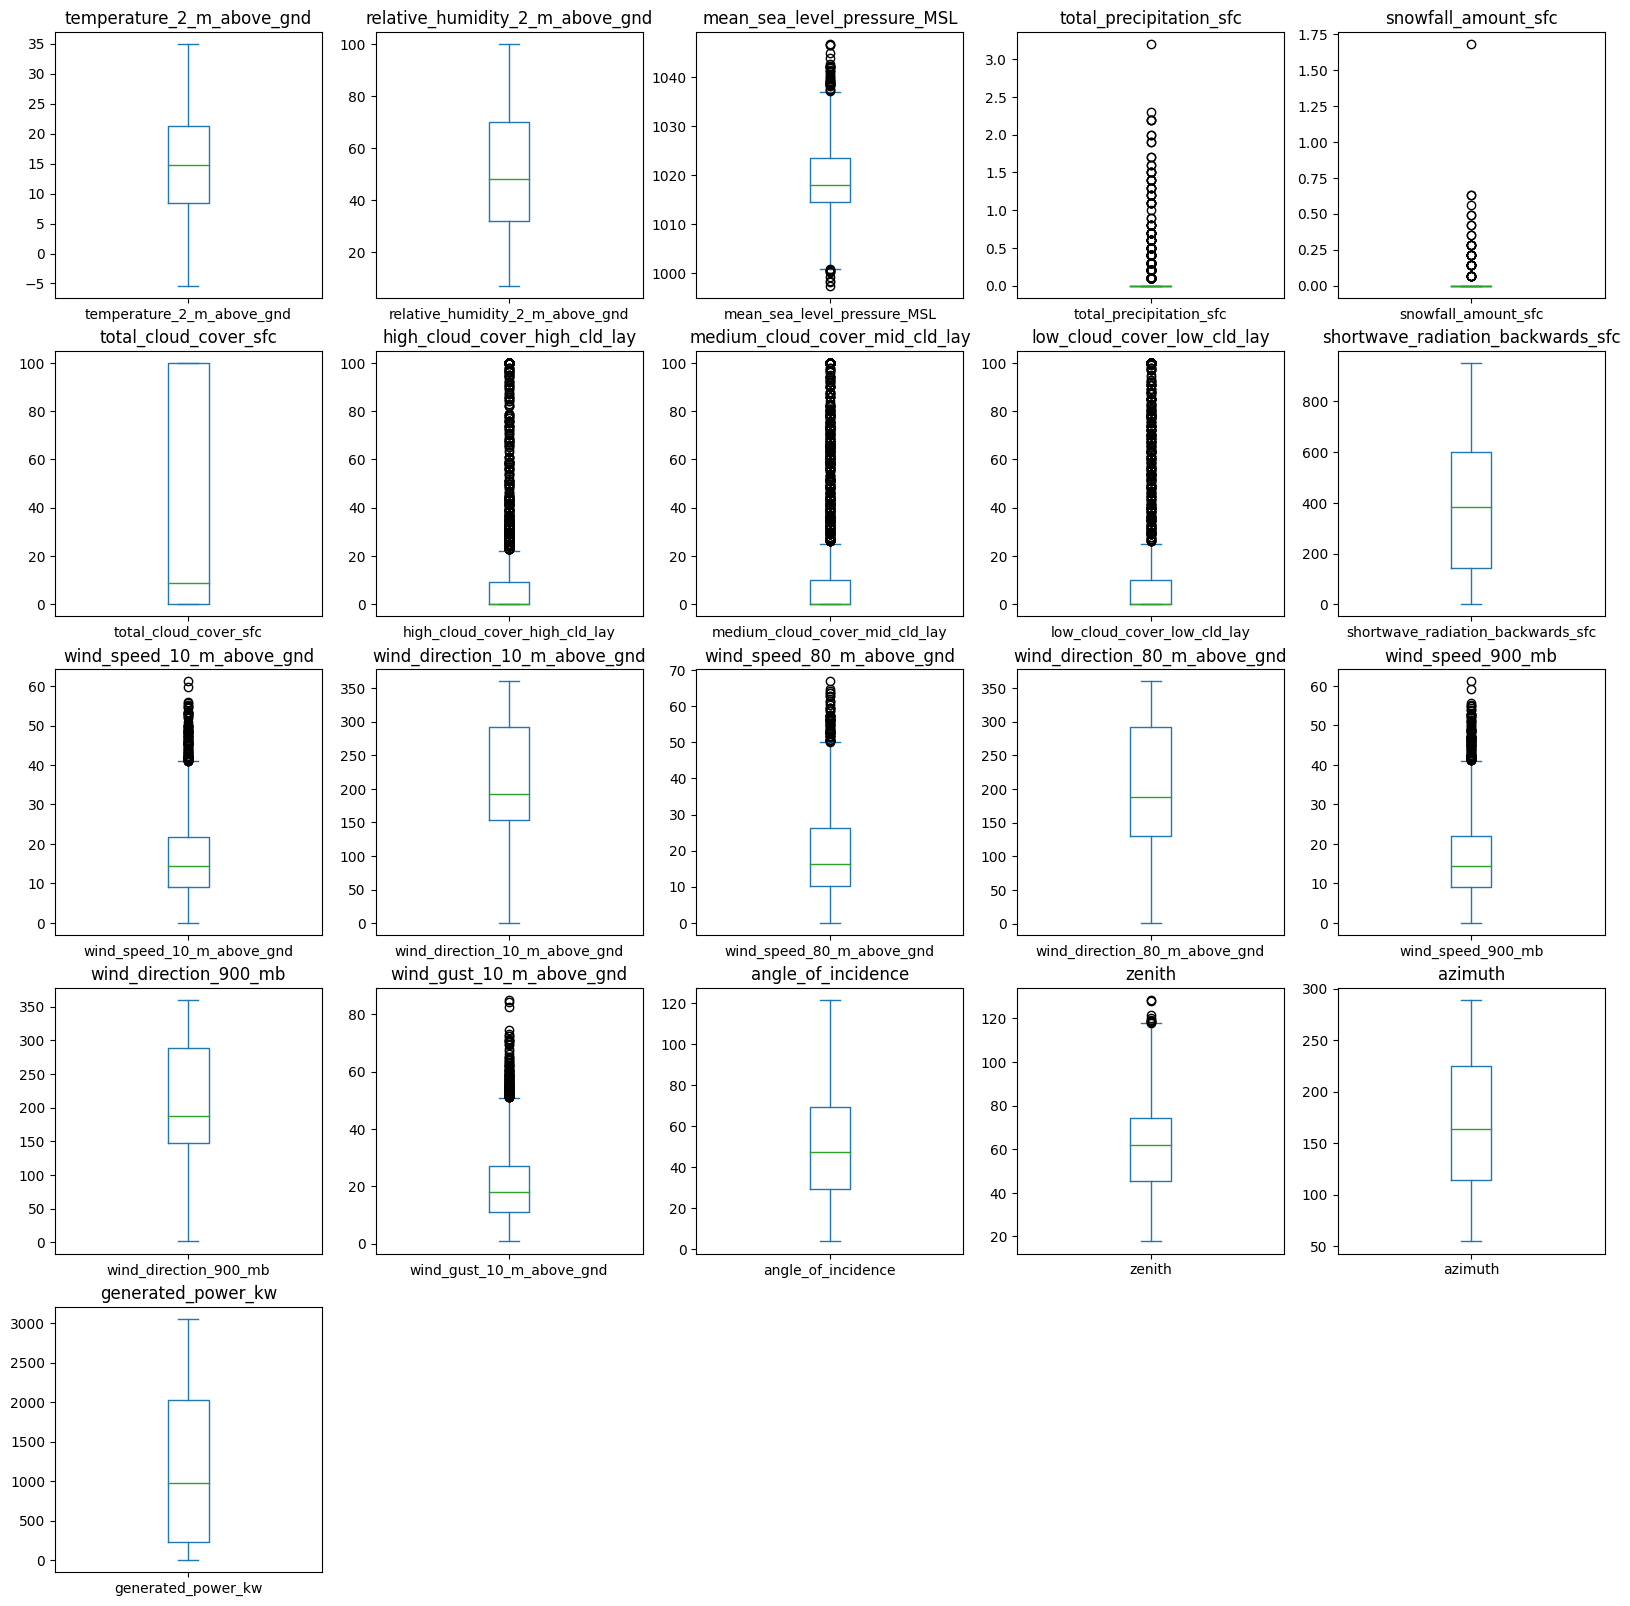

In [4]:
import matplotlib.pyplot as plt

# 다양한 column들의 boxplot 보기, 너무 이상치 많은 분포는 칼럼에서 없앤다.
plt.figure(figsize=(20,20))
for i in range(len(df.columns)):
    plt.subplot(5,5,i+1)
    df[df.columns[i]].plot(kind='box')
    plt.title(df.columns[i])

질문 2. 이러한 칼럼 값들과 PV의 상관계수는 어떻게 될까?

temperature_2_m_above_gnd            0.217280
relative_humidity_2_m_above_gnd     -0.336783
mean_sea_level_pressure_MSL          0.150551
total_precipitation_sfc             -0.118442
snowfall_amount_sfc                 -0.049508
total_cloud_cover_sfc               -0.334338
high_cloud_cover_high_cld_lay       -0.147723
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
shortwave_radiation_backwards_sfc    0.556148
wind_speed_10_m_above_gnd           -0.083043
wind_direction_10_m_above_gnd       -0.073257
wind_speed_80_m_above_gnd           -0.157899
wind_direction_80_m_above_gnd       -0.069941
wind_speed_900_mb                   -0.107615
wind_direction_900_mb               -0.077435
wind_gust_10_m_above_gnd            -0.122808
angle_of_incidence                  -0.646537
zenith                              -0.649991
azimuth                             -0.061184
generated_power_kw                   1.000000
Name: generated_power_kw, dtype: f

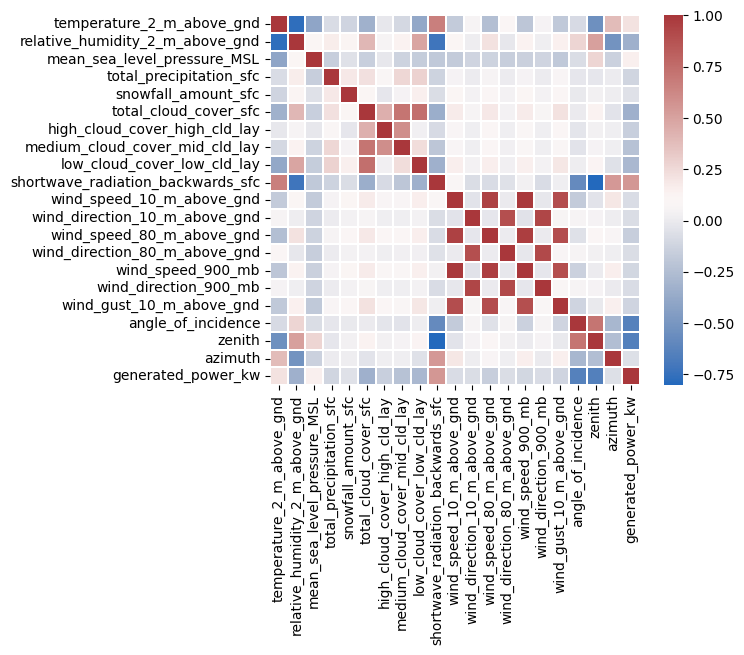

In [5]:
# Power Generation과 다른 칼럼들 간 상관관계 보기
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), vmin=df.corr().values.min(), vmax=1, square=True, 
        linewidths=0.1, annot_kws={"size":8}, cmap='vlag')

print(df.corr()['generated_power_kw'])

In [10]:
# 위 3개의 그래프를 따라 중요하다 생각되는 데이터만 모은다.

df2 = df[['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc', 'wind_gust_10_m_above_gnd', 'angle_of_incidence', 'zenith', 'generated_power_kw']]

from pathlib import Path
filepath = Path('importantshit.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath) 